In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
!pip install textblob      
import textblob           
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [18]:
#Keys are not visible because of privacy concers
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [19]:
# Create a custom search term and define the number of tweets
search_term = "#Lebanon + explosion -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-05-01').items(1000)
all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

['Families of Beirut port explosion victims organize a protest to demand the expedition of the investigation and to k… https://t.co/s2frMUqFIM',
 'Two months since the #Beirut explosion destroyed #Lebanese homes, lives and hopes.\n\nBest to to put a “repeat” alert… https://t.co/nzYWuNLLLz',
 'Anyone has contacts of those groups that are helping fix windows that broke during the explosion? thank you! #Lebanon',
 'The explosion in #Beirut, #Lebanon has been absolutely devastating to Lebanese people. If you’re looking for a way… https://t.co/iJfQek85cJ',
 '2 months after the Beirut Explosion, we still don’t have clear answers.\nWhat happened in Beirut?\nشو صار ببيروت؟… https://t.co/kZzRFTTRGe']

In [20]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['Families of Beirut port explosion victims organize a protest to demand the expedition of the investigation and to k',
 'Two months since the Beirut explosion destroyed Lebanese homes lives and hopesBest to to put a repeat alert',
 'Anyone has contacts of those groups that are helping fix windows that broke during the explosion thank you Lebanon',
 'The explosion in Beirut Lebanon has been absolutely devastating to Lebanese people If youre looking for a way',
 '2 months after the Beirut Explosion we still dont have clear answersWhat happened in Beirut']

In [21]:
# Create a list of lists containing lowercase words for each tweet and splitting
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:3]

[['families',
  'of',
  'beirut',
  'port',
  'explosion',
  'victims',
  'organize',
  'a',
  'protest',
  'to',
  'demand',
  'the',
  'expedition',
  'of',
  'the',
  'investigation',
  'and',
  'to',
  'k'],
 ['two',
  'months',
  'since',
  'the',
  'beirut',
  'explosion',
  'destroyed',
  'lebanese',
  'homes',
  'lives',
  'and',
  'hopesbest',
  'to',
  'to',
  'put',
  'a',
  'repeat',
  'alert'],
 ['anyone',
  'has',
  'contacts',
  'of',
  'those',
  'groups',
  'that',
  'are',
  'helping',
  'fix',
  'windows',
  'that',
  'broke',
  'during',
  'the',
  'explosion',
  'thank',
  'you',
  'lebanon']]

In [22]:
nltk.download('stopwords')
#stop words provided by nltk are all lower-case. This works well as we already have converted all of your tweet words to lower case.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91887\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['he',
 'hers',
 "hasn't",
 'yours',
 "she's",
 'yourself',
 "couldn't",
 'who',
 'will',
 'weren']

In [24]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['families',
 'beirut',
 'port',
 'explosion',
 'victims',
 'organize',
 'protest',
 'demand',
 'expedition',
 'investigation',
 'k']

In [25]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(20)

[('explosion', 116),
 ('lebanon', 116),
 ('beirut', 97),
 ('people', 43),
 ('lebanese', 39),
 ('devastating', 38),
 ('absolutely', 33),
 ('youre', 33),
 ('looking', 33),
 ('way', 33),
 ('port', 30),
 ('4', 19),
 ('arrest', 14),
 ('interpol', 12),
 ('lebanons', 11),
 ('captain', 11),
 ('owner', 11),
 ('august', 11),
 ('russian', 10),
 ('ship', 10)]

In [26]:
collection_words = ['lebanon','beirut','explosion']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]
tweets_nsw_nc[0]

['families',
 'port',
 'victims',
 'organize',
 'protest',
 'demand',
 'expedition',
 'investigation',
 'k']

In [27]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('people', 43),
 ('lebanese', 39),
 ('devastating', 38),
 ('absolutely', 33),
 ('youre', 33),
 ('looking', 33),
 ('way', 33),
 ('port', 30),
 ('4', 19),
 ('arrest', 14),
 ('interpol', 12),
 ('lebanons', 11),
 ('captain', 11),
 ('owner', 11),
 ('august', 11)]

In [28]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,people,43
1,lebanese,39
2,devastating,38
3,absolutely,33
4,youre,33


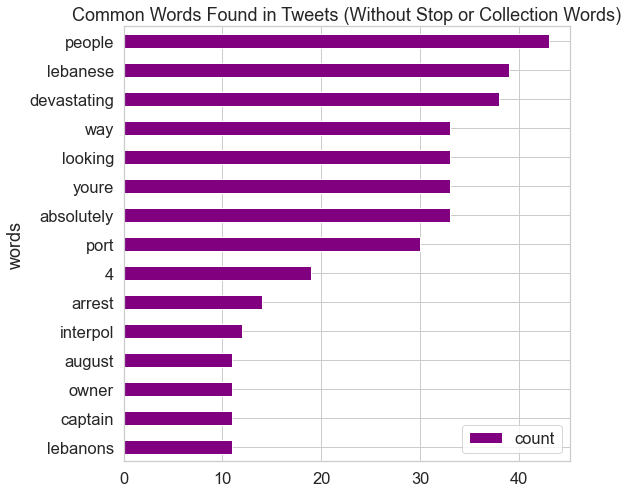

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [40]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("Families of Beirut port explosion victims organize a protest to demand the expedition of the investigation and to k"))

In [41]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0,
 'Families of Beirut port explosion victims organize a protest to demand the expedition of the investigation and to k']

In [43]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head(300)

,polarity,tweet
0,0.000000,Families of Beirut port explosion victims orga...
1,0.000000,Two months since the Beirut explosion destroye...
2,0.000000,Anyone has contacts of those groups that are h...
3,-1.000000,The explosion in Beirut Lebanon has been absol...
4,0.100000,2 months after the Beirut Explosion we still d...
...,...,...
189,-0.065909,2moro Ill be posting up my new song You Are Ne...
190,-1.000000,The explosion in Beirut Lebanon has been absol...
191,0.119048,WHO Lebanon daily brief on coronavirus with sp...
192,-1.000000,The explosion in Beirut Lebanon has been absol...


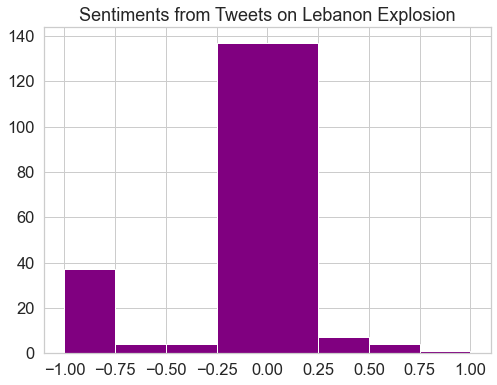

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Lebanon Explosion")
plt.show()

In [45]:
#Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

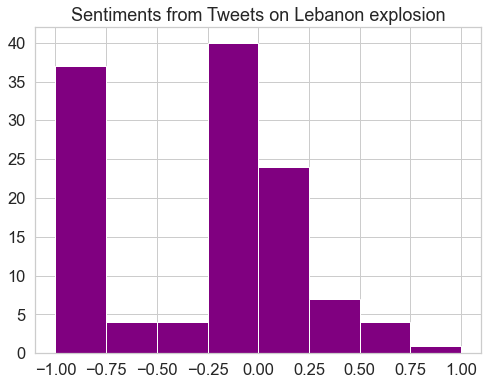

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Lebanon explosion")
plt.show()

In [50]:
testimonial =TextBlob(str(sentiment_values))
testimonial.sentiment

Sentiment(polarity=-0.15654148777605575, subjectivity=0.42080341926020925)

In [51]:
testimonial.sentiment.polarity

-0.15654148777605575

In [52]:
testimonial.sentiment.subjectivity

0.42080341926020925